In [1]:
import tensorflow.keras

In [2]:
from tensorflow.keras.datasets.mnist import load_data
#((訓練題目,訓練答案),(測試題目,測試答案))
# (x_train,y_train),(x_test,y_test) = load_data()
((x_train,y_train),(x_test,y_test)) = load_data()

In [3]:
#一定要做步驟:看一下訓練資料、測試資料有幾筆
#黑白圖像
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


1


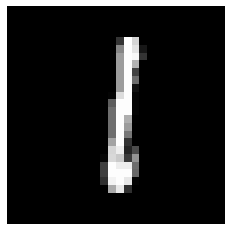

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random 
c = random.randint(0,60000-1)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c],cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#資料預處理
# 1.題目預處理(Normalize常態化)
#Keras在準備隨機那組weights,跟Normalize的圖片比較搭
#1.第一種方式:0~1 第二種方式-1~1
#攤開 → Keras MLP 規定一定要攤開成為一維
x_train_shape = x_train.reshape(60000,784) / 255
x_test_shape = x_test.reshape(10000,784) / 255
#Demo
x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
#2.答案預處理(One-Hot-Encoding)
#希望的樣子:[P0,P1,....,P9]
#5:[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#Demo
print("原來:",y_train[1])
print("後來:",y_train_cat[1])

原來: 0
後來: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
#建立模型
#第一種:蛋糕支架(Sequential)，堆上一層(Layers)
#Layers:Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
mlp = Sequential()
#第一層:input_dim → 告訴它輸入有幾個
#Param:784*128(神經元的連結)+128(128個輸出,128個激活 → 128個偏差bias)
mlp.add(Dense(128,activation="relu",input_dim=784))
#Param:128*10(神經元的連結)+10(10個輸出,10個激活 → 10個偏差bias)
mlp.add(Dense(10,activation="softmax"))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
#compile:確定模型訓練方式....等
#隨機(隨便選一組weights)梯度(正確方向)下降

#loss:最後輸出一個 → binary_crossentropy
#loss:最後輸出多個 → categorical_crossentropy

# optimizer:下降的時候優化 → 基於動量(我在走的時候不是等速度，而有速度的累積)
mlp.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
           optimizer="adam")


In [10]:
#batch:看幾筆(200)做一次梯度下降(修正)
#epochs:整份考古題看幾次(10)
#10個epochs、200batch:60000*10/200=3000(次)梯度下降(修正)
mlp.fit(x_train_shape,y_train_cat,batch_size=200,epochs=15,validation_split=0.1,verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 - 1s - loss: 0.4331 - accuracy: 0.8833 - val_loss: 0.1955 - val_accuracy: 0.9490
Epoch 2/15
54000/54000 - 1s - loss: 0.2032 - accuracy: 0.9420 - val_loss: 0.1429 - val_accuracy: 0.9605
Epoch 3/15
54000/54000 - 1s - loss: 0.1521 - accuracy: 0.9564 - val_loss: 0.1146 - val_accuracy: 0.9687
Epoch 4/15
54000/54000 - 1s - loss: 0.1203 - accuracy: 0.9652 - val_loss: 0.1040 - val_accuracy: 0.9730
Epoch 5/15
54000/54000 - 1s - loss: 0.0978 - accuracy: 0.9719 - val_loss: 0.0935 - val_accuracy: 0.9718
Epoch 6/15
54000/54000 - 1s - loss: 0.0825 - accuracy: 0.9772 - val_loss: 0.0893 - val_accuracy: 0.9758
Epoch 7/15
54000/54000 - 1s - loss: 0.0701 - accuracy: 0.9803 - val_loss: 0.0833 - val_accuracy: 0.9757
Epoch 8/15
54000/54000 - 1s - loss: 0.0606 - accuracy: 0.9828 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 9/15
54000/54000 - 1s - loss: 0.0515 - accuracy: 0.9855 - val_loss: 0.0770 - val_accuracy: 0.9782
Epoch 10/15
540

In [11]:
#Predict完後，跟正確答案做一個比較
mlp.evaluate(x_test_shape,y_test_cat)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07139346318324097, 0.9785]

In [12]:
# predict → 機率
# predict_classes → 分類
pre = mlp.predict_classes(x_test_shape)
pre

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

,0,1,2,3,4,5,6,7,8,9
0,970,0,0,3,0,1,3,1,2,0
1,0,1121,3,2,0,1,2,2,4,0
2,4,2,1005,3,2,1,3,7,5,0
3,2,0,2,988,0,6,0,5,6,1
4,1,0,4,1,956,1,7,2,2,8
5,3,0,0,3,0,876,5,0,3,2
6,4,2,2,1,4,3,941,0,1,0
7,1,5,8,2,0,0,0,1002,4,6
8,5,0,2,6,4,4,1,2,947,3
9,4,4,0,4,8,4,1,4,1,979


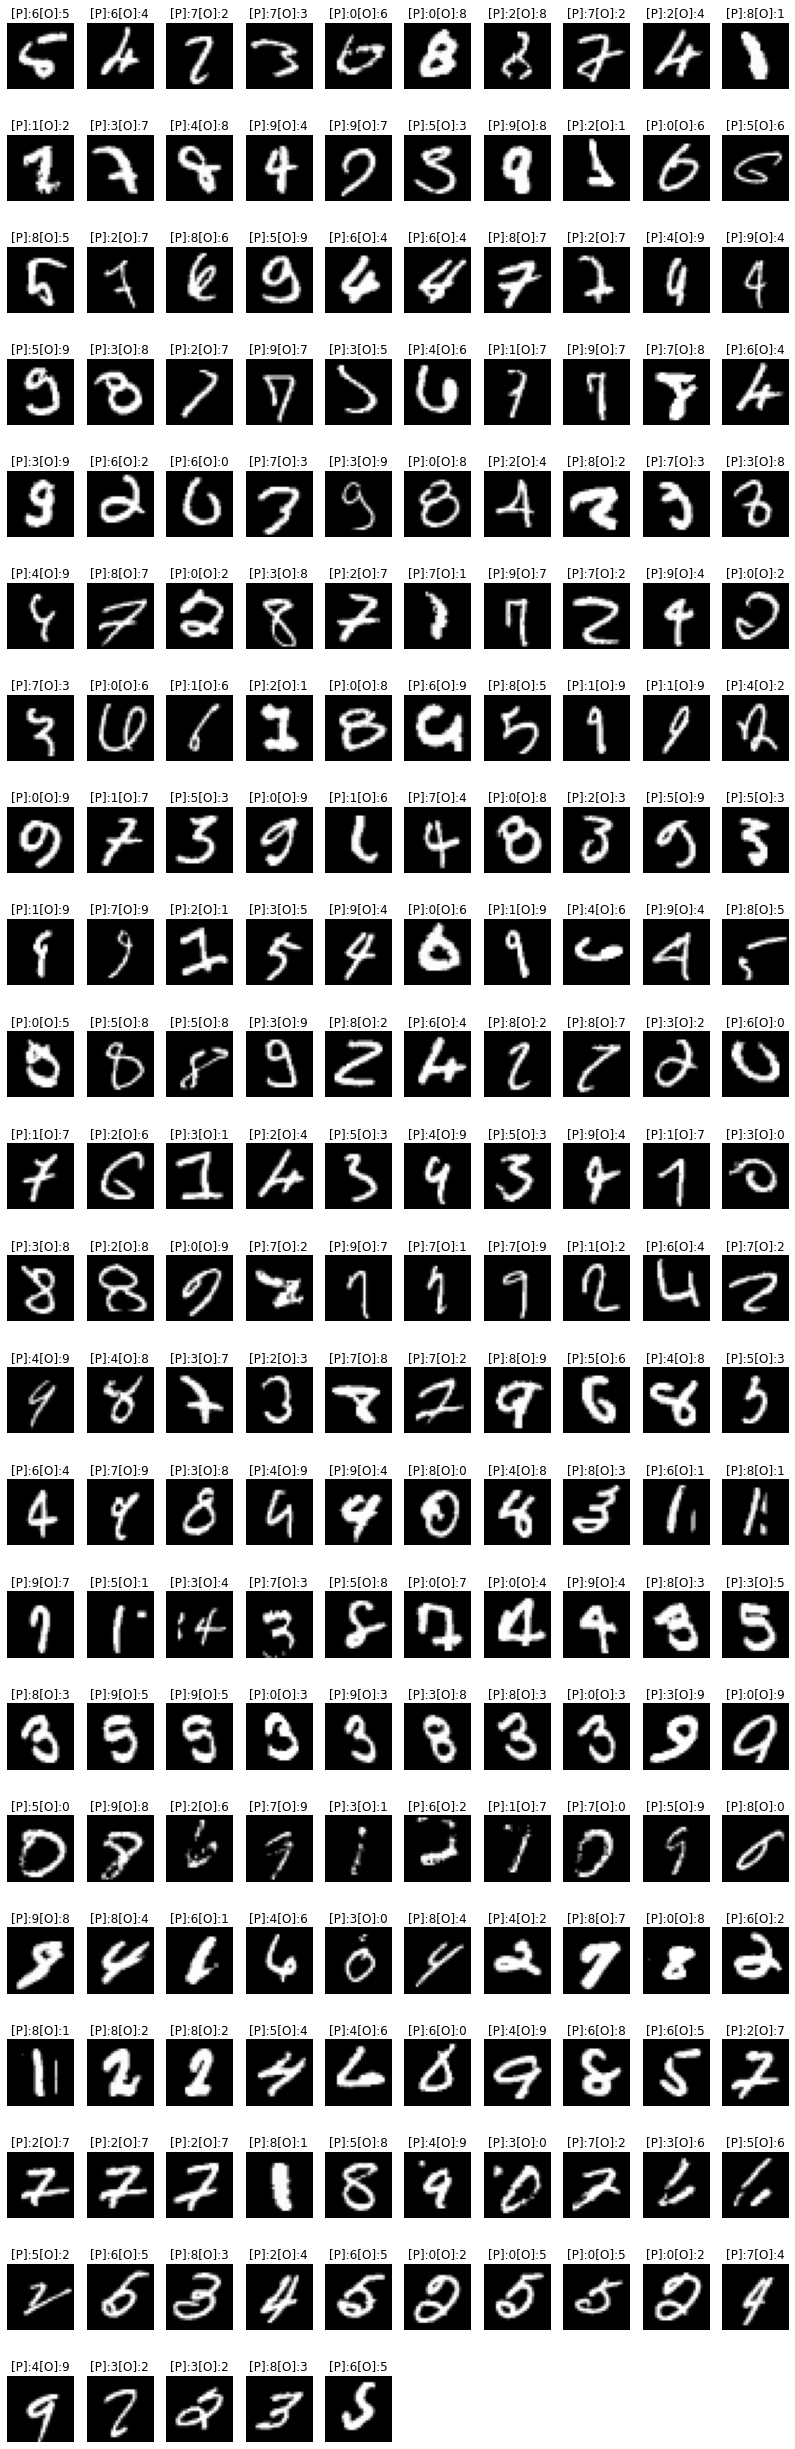

In [14]:
# numpy才能這樣直接每個數字比較
import numpy as np
#list:list(一個數字)
#numpy array:nparray[[多個數字]]
diff = np.nonzero(pre != y_test)[0]
#預測錯誤的圖的原本標籤
ori_false = y_test[diff]
#預測錯誤的圖的預測標籤
pre_false = pre[diff]
#把圖拿出來
img_false = x_test[diff]
#整張圖的寬高
plt.figure(figsize=(14,45))
#我們每一個列就是10個
width = 10
height = int(len(img_false)/10)+1
for (i,img) in enumerate(img_false):
    #(列數,行數,第幾張圖(i開始))
    plt.subplot(height,width,i+1)
    plt.axis("off")
    t="[P]:"+ str(pre_false[i]) + "[O]:"+str(ori_false[i])
    plt.title(t)
    plt.imshow(img,cmap="gray")